# PHYS 267 - Chapter 6<br><font color='blue'>Summarizing Quantities and Applications of Distributions</font>
###### Last Updated: Jan 9, 2023 by Dr. Brenda Lee
***

### <font color="blue">6.1 Chapter Overview</font>

In the previous chapter, we introduced random variables and several different discrete and continuous probability distributions. Now, we want to take a look at how we can characterize these distributions numerically, and see how they can be applied to various fields of physics.

<div class="alert alert-block alert-info">💎<b>Chapter Objectives</b>:<br>
    <ol>
        <li>Determine the summarizing quantities for a given distribution</li>
        <li>Understand the moments of a distribution and how to find them from a given distribution</li>
        <li>Define and apply the Central Limit Theorem</li>
        <li>Understand the applications of Gaussian distribution to physics examples</li>
    </ol>
</div>

### <font color="blue">6.2 Summarizing Quantities for Distributions</font>

When we have a population distribution, we will effectively have a mathemtical expression that can fully define the distribution. After all, we've modelled the entire population, right? But when we have a sample distribution, we don't have the luxury of assuming our sample is completely accurate. As a result, we need an object way to characterize the observed distribution. This will allow us to answer questions related to how widely spread the values are, which values are the "most likely", and whether there is a peak or two or even more. If we can calculate these properties for an observed sample distribution, we can take them as **estimates** of the population distribution. Most of these, you are already familiar with!

#### 6.2.1 Measures of Location

When we take a look at a distribution, one of the easiest ways of describing it would be to look at its measures of location: mean, median and mode. Let's take a look at each of these separately.

- The **mean** or **average** will be the most common estimate of the location of a distribution. 
    - For a population, we have: $$\mu = \int x p(x) dx$$
    - For a sample, we have: $$\bar{x} = \frac{\sum x_i}{N}$$
    - Note that as $N \rightarrow \infty, \bar{x}\rightarrow\mu$
- The **median** is the value for which half the values are above and half below and is very useful when working with transformations of $x$, but difficult to work with mathematically
- The **mode** helps us determine the most probable value, or where the local density of $x_i$ is highest, but is highly sensitive to how you bin your data

In the previous chapter, we presented the code for various distributions. With each distribution, there was the option to use the `distribution.mean()` function from `scipy`, where `distribution` refers to the chosen probability distribution. Using Python helps us determine these measures of location for a given distribution quite efficiently.

#### 6.2.2 Measures of Spread

The location of values within a distribution are just one way of summarizing the characteristics of probability distributions. In other cases, we want to see how far the data spreads. Are they highly localized between certain values, and what is their behaviour in the anterior and posterior of the curve? This is defined by measures of spread: standard deviation, variance, etc. 

For **sample variance $s$**, we have: $$s^2 = \frac{\sum(x_i-\bar{x})^2}{n-1}$$

And for **population variance**, we have: $$\sigma^2 = \int(x-\mu)^2p(x) dx$$

Note that we can find the **standard deviation** $s$ or $\sigma$ for the sample and population, respectively, by taking the square root of each equation. 

Another important quantity to be aware of is the **coefficient of variation**, defined as follows:

<div class="alert alert-success">
  <strong>Coefficient of Variation:</strong> A dimensionless quantification of spread that can be used as a comparison to other distributions. Defined as the ratio between the standard deviation and the mean. Commonly referred to as "CV" or "RSD" for relative standard deviation, this is highly useful in expressing the precision and repeatability of an experiment.<br>
    $$\text{coefficient of variation} = \frac{s}{\bar{x}}$$
</div>

#### 6.2.3 Percentiles of a Distribution

Sometimes, it is important for us to know what range of $x$ values will encompass "most" of the outcomes of an experiment. For example, we may want to be able to answer a question like this: *Where will 95% of the data fall between?* Given our knowledge of probability distributions and how to calculate individual probabilities (via PMF and PDF functions) and cumulative probabilities (via CDF functions), we can easily integrate or find the area under our probability function $p(x)$ to find two values of $a$ and $b$ such that:

$$P_\text{int} = \int_a^b p(x) dx$$

where $P_\text{int}$ is defined as our **percentile**. 

Can anyone see a problem with this? There are in fact, several issues we must be aware of when dealing with percentiles and answering such questions:
- Maybe your distribution is not analytically integrable, so the best you can get is an approximation based off of tables of integrals or computer algorithms
- Maybe there are various pairs of $a$ and $b$ that give you the same $P_\text{int}$ value, so further clarification is required to limit the domain of $a$ and $b$ that are valid to the question you are asking

The most important lesson here is that when asking such questions, and when answering these questions, we have to be careful. And that is why framing our question precisely, and making our hypothesis very clear is of utmost importance when it comes to hypothesis testing problems. This is something we will tackle in the next few chapters as we move on to data analysis and statistics.

#### 6.2.4 Quantitative Measures for Multivariate Distributions

We never really discussed multivariate distributions in previous chapters. However, the analysis is quite similar and we may touch on this in future chapters when we work with more than one variable in our sample set.

Let's start with a **bivariate distribution** that would be represented by a function given as $p(x,y)$. We can easily find the quantitative measures for $x$ and $y$ by forming marginal distributions $f(x)$ and $g(y)$ to calculate the mean and variance for each variable. But, when it comes to finding a relation between these variables, we have to introduce a new term called **covariance**, defined as follows for $x$ and $y$ for a bivariate distribution:

<div class="alert alert-success">
  <strong>Sample Covariance:</strong> A statistical tool used to determine the relationship between two random variables. If there is no tendency for variables to vary together, then the terms within the sum will likely be positive and negative, thus allowing the sum to move towards zero and no relation.
    $$s_{xy} = \frac{1}{n-1}\sum(x_i-\bar{x})(y_i-\bar{y})$$
</div>

This idea can be extended to any number of random variables for a **multivariate distribution**, where all of the covariance values $s_{ij}$ between any two variables $x_i$ and $x_j$ can be merged together into a **covariance matrix**.

We can easily use the `multivariate_normal` package from `scipy.stats` to help us model this distribution in Python. We will not be covering this in this workbook.

### <font color="blue">6.3 Expected Values and Moments of a Distribution</font>

In the previous workbook and lecture series, we had mentioned four key characteristics used to summarize the features of a distribution. These were collectively called the **moments of a distribution**. But before getting into this, we need to know where it comes from and we start with a discussion about **expected values**.

#### 5.3.1 Expectation Values

The **expected value $E$** of a random variable is defined as the average of all of its possible values, weighted by the probability of occurrence of each value. 

For a discrete random variable $X$: $$E(X) = \langle X\rangle =  \sum_x XP(X)$$

For a continuous random variable $x$: $$E(x) = \langle x\rangle = \int_{-\infty}^{\infty} xP(x)dx$$

These expected values also have rules that can easily be applied:
- $E(X+Y) = E(X) + E(Y)$
- $E(X-Y) = E(X) - E(Y)$
- $E(aX+b) = aE(X) + b$
- $E(aX+bY) = aE(X) + bE(Y)$
- $E(a) = a$

#### 6.3.2 Moments of a Distribution

Now that we know what expected values are, we can define the **moments of a distribution**. There are four of them: mean, variance, skewness and kurtosis. The definition of "moment" is identical to that which we have learnt in Physics: the product of a distance and physical quantity to determine how the physical quantity is located or arranged within a distribution. This moment can then be defined as:

$$m_n = E(x^n)$$

The moments are simply quantities we want to represent the features of a distribution, starting with the simplest ones.

##### 0th Moment

With $n=0$, we have:
$$m_0 = \int_{-\infty}^{+\infty}p(x)dx = 1$$

This works as long as our distribution $p(x)$ is properly normalized.

##### 1st Moment: Mean

The expected value of $x$ can be determined by the first moment:
$$m_1 = E(x) = \mu$$

##### 2nd Moment: Variance

The expected value of $x$ can be determined by the second moment:
$$m_2 = E(x^2)$$

This is tough. It's probably better if we shift the origin of $x$ to the mean so that we can define a newfound *centred moment* around the mean:

$$\mu_n = E[(x-E(x))^n] = E[(x-\mu)^n]$$

This means that $\mu_0=1$ and $\mu_1=0$; and we can define the second centred moment as:

$$\mu_2 = E[(x-\mu)^2]=\text{var}(x) = s^2 \text{ for sample or } \sigma^2 \text{ for population}$$

In other words, we can derive that the second moment gives us the **variance** of the distribution. All higher moments will then be based on these standardized moments.

##### 3rd Moment: Skewness

The **skewness** is defined as the 3rd moment ($\mu_3$) which characterizes the degree of asymmetry of a distribution. It is defined as:
$$\alpha_3 = \frac{\mu_3}{s_3}$$

A symmetric distribution will have $\alpha_3=0$ and a moderately skewed distribution may have values from 1/2 to 1. Distributions that are skewed to the left (longer anterior tail) will have a negative skewness, and those that are skewed to the right (longer posterior tail) will have a positive skewness.

##### 4th Moment: Kurtosis

**Kurtosis** gives the degree of "peakiness" of a distribution. A better way of visualizing this would be to determine how sharp the peaks are. We have kurtosis defined as follows:

$$\alpha_4 = \frac{\mu_4}{s_4}$$

with values ranging from 1 to $\infty$. A normal distribution has $\alpha_4=3$ so it is common to compare to this be defining *excess kurtosis* as $\alpha-3$. This gives us the following terms:
- **Mesokurtic** distributions where distributions have zero excess kurtosis (normal distribution)
- **Leptokurtic** distributions where distributions have a positive excess kurtosis (very sharp peak)
- **Platykurtic** distributions where distributions have a negative excess kurtosis (very dull, rounded peak)

Luckily, we do not have to do these calculations by hand. Using any distribution from `scipy`, such as `norm`, `binom`, `poisson`, etc., we can simply use the `.stats()` function which calculates the mean(m), variance(v), skew(s) and kurtosis(k) for our distribution directly. To further simplify the process, we can calculate the first four moments by defining these variables:

    mean, var, skew, kurt = norm.stats(moments='mvsk')

### <font color="blue">6.4 Central Limit Theorem (CLT)</font>

When discussing probability theory, the **central limit theorem** states that in many situations under general conditions, the sums and means of random samples of measurements drawn from a population will tend to have an approximately normal distribution. 

<div class="alert alert-info">
  <strong>Central Limit Theorem:</strong> If random samples of $n$ observations are drawn from a non-normal population with finite mean $\mu$ and standard deviation $\sigma$, then the sampling distribution of the sample mean $\bar{x}$ will approach a normal distribution if $n$ is very large, defined by: $$\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$$
</div>

This tells us that the approximation because more and more accurate as $n$ becomes large. This also tells us that the spread of the distribution of sample means is considerably less than the spread of the sampled population. 

So, when can we use the CLT?
- A **normal** distribution will already have a sampling distribution of $\bar{x}$ that is normal no matter what sample size you choose
- A **symmetric** distribution already has the shape of a normal distribution, and should become relatively normal for small values of $n$
- A **skewed** distribution will require a large sample size $n$ before the sampling distribution of $\bar{x}$ becomes approximately normal (usually $n \ge 30$)

### <font color="blue">6.5 Gaussian Distributions in Real Life</font>

In the previous chapter, we had mentioned that Nature regularly follows normal distributions, which why they are called 'normal'. But what kinds of examples are there in Physics that follow such Gaussian distributions?

#### 6.5.1 The Maxwell-Boltzmann Speed Distribution

Back in the 1860s, James Clerk Maxwell derived a distribution to describe the speeds of atoms and molecules in idealized gases. This assumes that the particles will move freely inside a stationary system without interacting, apart from brief collisions where there is momentum and energy exchange. Later on in the 1870s, Ludwig Boltzmann came along and derived this using  investigations of the distribution's physical origins. This distribution comes from Maxwell-Boltzmann statistics in statistical mechanics, where an entire set of statistical derivations are used to describe the distribution of classical particles over various energy states in thermal equilibrium. 

According to kinetic molecular theory, we note that:
- Gases are composed of a large number of particles that behave like hard, spherical objects in a state of constant, random motion
- These particles move in a straight line until they collide with another particle or at the boundaries of the system
- These particles are much smaller than the distance between particles and therefore, the majority of gas volume is empty space
- There is no force of attraction between gas particles or particles and the boundary
- Collisions that take place are perfectly elastic and there is no loss of energy that takes place
- The average kinetic energy of a collection of gas particles depends on temperature and nothing else

However, the problem is that when we are looking at a mole of ideal gas, it is quite impossible to measure the velocity of each molecule for each instant of time. So, this is where the Maxwell-Boltzmann distribution comes into play! It allows us to detemine how many molecules are moving between two velocities $v_a$ and $v_b$ as a probability. Assuming one-dimensional distributions are independent of each other, we can define the Maxwell-Boltzmann distribution by:

$$\frac{dN}{N} = \left(\frac{m}{2\pi k_B T}\right)^{1/2} e^{\frac{-mv^2}{2k_BT}} dv$$

where
- $dN/N$ is the fraction of molecules moving at velocities $v_a$ to $v_d$
- $m$ is the mass of the molecule
- $k_B$ is the Boltzmann constant
- $T$ is the absolute temperature

We can actually rewrite this as a function in terms of a scalar quantity of speed $v$, instead of the vector quantity of velocity. This form helps us define the distribution of gas molecules moving at different speeds:

$$p(v) = 4\pi \left(\frac{m}{2\pi k_B T}\right)^{3/2}v^2 e^{\frac{-mv^2}{2kT}}$$

From this, we can now work through an explanation as to how the Gaussian distribution is integrated into this equation above. When we look at gases in thermal equilibrium, the speeds of the particles folow a distribution which rises initially as $v^2$ and then declines exponentially. However, in three-dimensions, we can break down each component of velocity into $v_x, v_y, v_x$, with each having a Gaussian distribution. For example, if we look at the $x$-component of momentum, each collision will add or substract momentum with equal probability. The final momentum in the $x$-direction is simply the sum of many random variables, and has a probability given by a normal distribution. This has a specific term - each molecule will perform its own **random walk** in momentum space, which we will cover later. If we apply this logic to each velocity component, we end up with a tri-variate (three-dimensional) Gaussian distribution, where: $$r = v = \sqrt{v_x^2+v_y^2+v_z^2}$$

Take note that each component has a Gaussian distribution that is centered at zero. This means that every particle is equally likely to move in the positive or negative $x, y, z$ direction. 
- But what makes this distribution unique is that temperature will play a role in the magnitude of this movement, which is defined by variance. As a result, we can make a fairly strong estimate that $\sigma^2 \propto T$. 
- Thinking further, we note that molecules have different shapes and sizes which leads to different molecular masses denoted as $m$. The larger the particles, the more slowly they will move. Logically, we can conclude that $\sigma^2 \propto 1/m$. 
- Combining these two together, we can come up with a combined relation where $\sigma^2 \propto T/m$. We introduce a constant $k$ to get the following definition for variance in a Maxwell-Boltzmann distribution: $$\sigma^2 = \frac{kT}{m}$$

Can we model this distribution? Let's try using the `maxwell` pacakge from `scipy.stats` for a generation example. To model this distribution would require simulation knowledge (particles moving at random points in a 2D space for 1 component variable of speed), which will not be covered in this course.

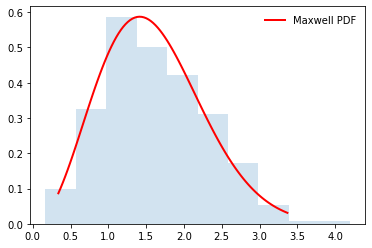

In [20]:
from scipy.stats import maxwell
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
x = np.linspace(maxwell.ppf(0.01), maxwell.ppf(0.99), 100)
ax.plot(x, maxwell.pdf(x), 'r-', lw=2, label='Maxwell PDF')
r = maxwell.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

#### 6.5.2 Distribution of Stellar Masses (in Young Star Clusters)

Another example of where we can find Gaussian distributions in Nature is in space, with stars and their masses. In fact, the distribution of masses in stars agrees so well that there is a universal stellar mass function. But, it's not quite noticeable right away. It is skewed significantly to the right to the point where it looks like an exponential function.

However, we can easily calcultae the log of the mass of each star, and we end up getting a **Log-Gaussian** distribution, which looks like a normal distribution. Apart from that, due to the fact that the formation of stellar mass is considered a product of a large number of independent and identically distributed random variables determined by multiple processes, we can invoke the Central Limit Theorem to establish that the log of the product of random variables will follow a Gaussian distribution.

Log-Gaussians actually occur quite frequently in Nature. They will not be something we cover in this course.

### <font color="green">6.6 Practice Problems</font>

Try to answer these problems yourself before the live lectures and tutorials. Feel free to connect with your peers on Discord or on campus if you prefer to work together. If you are struggling with them, we will cover them during live sessions.

#### Problem 6A

Use the Central Limit Theorem to explain why a Poisson random variable (ie. the number of particular type of bacteria in a cubic metre of water), has a distribution that can be approximated by a normal distribution when the mean $\mu$ is large. 

#### Problem 6A - Solution

We can explain this as follows:
- A Poisson random variable will measure the number of successes among independent trials, within a fixed time interval
- We are told that the mean $\mu$ is large, which means that there must be a large number of successes within this interval
- Because we have a large number of successes (ie. p is higher), that meaens thaat the sample size $n$ must also be quite large. We are dealing with discrete quantities here, which means that the number of successes you have will be less than the total number of successes/failures overall
- When $n \ge 30$, we can apply the Central Limit Theorem; so in this case because we know that $n$ is very large, we can conclude that our sample is sufficiently large enough to be approximated as a normal distribution

#### Problem 6B

Your friend has performed an experiment and recorded results for a continuous variable. Use Chapter06_SampleData.txt to plot the data points and find the moments of the distribution. 

#### Problem 6B - Solution

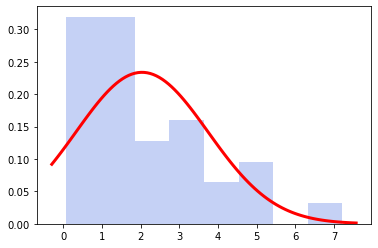

MVSK: 2.0342857142857147 2.910544489795918 1.137015484969512 3.747396689051581


In [63]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, skew, moment, kurtosis

# Plot data points as a histogram
samplefig, sampleax = plt.subplots(1, 1)
sampledata = np.loadtxt("./Files/Chapter06_SampleData.txt")
sampleax.hist(sampledata, bins=8, density=True, alpha=0.3, color='royalblue')

# A continuous variable means uniform, exponential or normal distribution
# Let's try two different distribution fits
# Fit a normal distribution to the data by defining mean and standard deviation
samplemu, samplestd = norm.fit(sampledata)
xmin, xmax = plt.xlim()
xpoints = np.linspace(xmin, xmax, 100)
samplenormal = norm.pdf(xpoints, samplemu, samplestd)
sampleax.plot(xpoints, samplenormal, 'r', linewidth=3)
plt.show()

# Fit an exponential distribution to the data by defining mean and standard deviation

# Find the moments of the distribution
samplemean = np.mean(sampledata)
samplevariance = np.var(sampledata)
sampleskew = skew(sampledata)
samplekurtosis = kurtosis(sampledata) + 3
print("MVSK:", samplemean, samplevariance, sampleskew, samplekurtosis)